In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [17]:
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

# Preparing Model on Train data

In [2]:
df_train=pd.read_csv('../input/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking shape of data
df_train.shape

(891, 12)

In [4]:
#checking whole description of data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocessing the train data

In [7]:
#checking for missing values
df_train.isnull().sum()

#So Age , Cabin and Embarked columns have missing values which should be taken care of.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
 df_train.drop(['Name','Cabin','SibSp','Parch','Ticket'],axis='columns', inplace=True)


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [10]:
#now imputing missing values of Age column by its mean
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean()) 

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [11]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
dtype: int64

In [12]:
df_train.drop(columns=['Sex','Embarked'],inplace=True)

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Age,Fare
0,1,0,3,22.0,7.2500
1,2,1,1,38.0,71.2833
2,3,1,3,26.0,7.9250
3,4,1,1,35.0,53.1000
4,5,0,3,35.0,8.0500


In [16]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000


<AxesSubplot:>

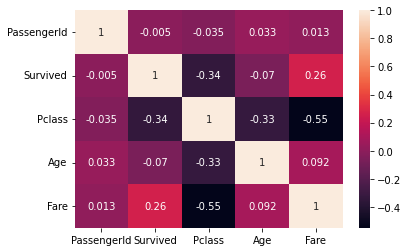

In [20]:
sns.heatmap(df_train.corr(),annot=True)

In [22]:
X = df_train.drop(['Survived'],axis=1)
X

,PassengerId,Pclass,Age,Fare
0,1,3,22.000000,7.2500
1,2,1,38.000000,71.2833
2,3,3,26.000000,7.9250
3,4,1,35.000000,53.1000
4,5,3,35.000000,8.0500
...,...,...,...,...
886,887,2,27.000000,13.0000
887,888,1,19.000000,30.0000
888,889,3,29.699118,23.4500
889,890,1,26.000000,30.0000


In [24]:
y=df_train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [28]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'Fare'], dtype='object')

In [31]:
y_train.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [55]:
model=RandomForestClassifier(n_estimators=200, min_samples_leaf=2)

In [56]:
model.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

# Predicting on Test Data

In [63]:
df_test=pd.read_csv('../input/titanic/test.csv')

In [64]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
print(df_test.shape)
print(df_train.shape)

(418, 11)
(891, 5)


In [69]:
df_test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [70]:
#now imputing missing values of Age column by its mean
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean()) 

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean()) 

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [75]:
df_test.drop(columns=['PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True)

In [76]:
df_test.head()

,Pclass,Age,Fare
0,3,34.5,7.8292
1,3,47.0,7.0000
2,2,62.0,9.6875
3,3,27.0,8.6625
4,3,22.0,12.2875


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [121]:
model=RandomForestClassifier(n_estimators=300, min_samples_leaf=2)


In [122]:
model.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=300)

In [123]:
y_pred=model.predict(X_test)


In [132]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,0
1,1
2,0
3,1
4,0
...,...
290,0
291,0
292,1
293,1


In [124]:
print(accuracy_score(y_pred, y_test))


0.7254237288135593


In [125]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       200
           1       0.56      0.71      0.62        95

    accuracy                           0.73       295
   macro avg       0.70      0.72      0.70       295
weighted avg       0.75      0.73      0.73       295

[[147  53]
 [ 28  67]]


# Preparing Submission File

In [128]:
# Making Submission File for submission
df_submission=pd.read_csv('../input/titanic/gender_submission.csv')

In [133]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('../input/titanic/gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],y_pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)